In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = "12  & 380 & ERROR & +  & ++ & 0.9  \\\n20  & 379 & 22.3 & +  & ++ & 1.44 \\\n\t\t30  & 378 & 19.1 & -- & -- & 1.41 \\\n\t\t42  & 377 & ERROR & -  & +  & 1.04 \\\n\t\t50  & 375 & 18.5 & +  & ++ & 1.17 \\\n\t\t60  & 373 & 13.6 & 0  & +  & 1.18 \\\n\t\t72  & 371 & 11.1 & -- & -- & 1.95 \\\n\t\t80  & 369 &  8.4 &    &    &      \\\n\t\t95  & 367 & 6.6  &    &    &      \\\n\t\t108 & 365 & 5.2  &    &    &      \\\n\t\t118 & 359 &  4.55 &    &    &      \\\n\t\t125 & 361 & 4.45  &    &    &"
t = []
V_ges = []
V_naoh = [] 
for row in data.split("\n"):
    rd = [a.strip() for a in row.split("&")]
    if(rd[2]=="ERROR"):
        continue
    t.append(int(rd[0]))
    V_ges.append(int(rd[1]))
    V_naoh.append(float(rd[2]))

t,V_ges,V_naoh = np.array(t), np.array(V_ges) * 1e-3, np.array(V_naoh) * 1e-3

# Hier hole ich mir die daten aus dem Latex dokument. Nicht weiter Wichtig
print(t,V_ges,V_naoh)

[ 20  30  50  60  72  80  95 108 118 125] [0.379 0.378 0.375 0.373 0.371 0.369 0.367 0.365 0.359 0.361] [0.0223  0.0191  0.0185  0.0136  0.0111  0.0084  0.0066  0.0052  0.00455
 0.00445]


Text(0, 0.5, 'Coversion p [%]')

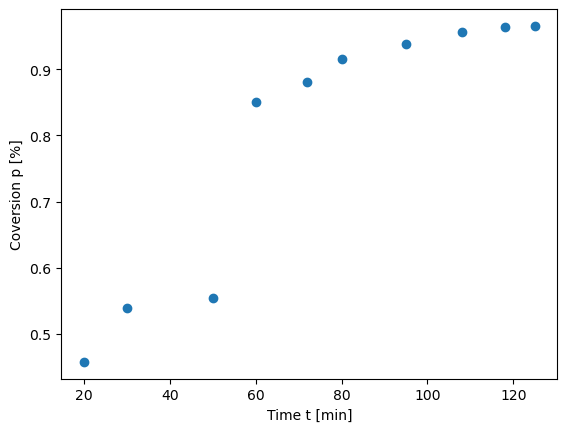

In [ ]:
fig,ax = plt.subplots()


n_Kat = 1.66e-3
c_Kat = n_Kat/V_ges[0]

#Errechnen der Stoffmengen an Säure in je 1 und 2 ml unter Berücksichtugung der Menge des Katalysators
c_1ml = .5 * 0.01 * V_naoh[0:3]-c_Kat*1e-3 # mol/ml
c_2ml = .5*0.01 * V_naoh[3:] -c_Kat*2e-3# mol/2ml

# Wandle um in korrekte Einheit
c_1 = c_1ml*1e3
c_2 = c_2ml/2 *1e3

# Generieren der Gesamtliste und berechnung der Ursprungskonzentration 
c_COOH = np.concat([c_1,c_2])
c_0 = 75.0009e-3 / 380e-3



# Umsatzberechnung
p = (c_0-c_COOH)/c_0

ax.scatter(t,p)
ax.set_xlabel("Time t [min]")
ax.set_ylabel("Coversion p [%]")


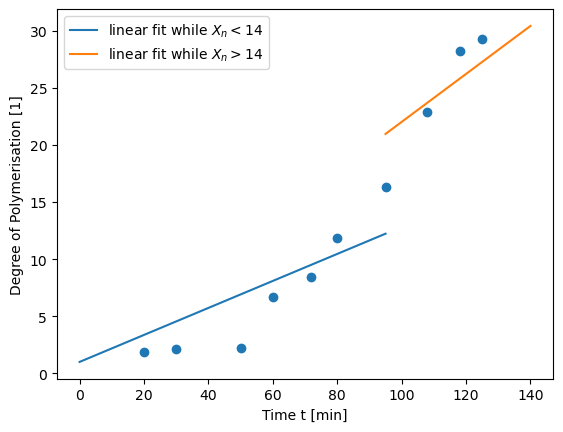

In [8]:
fig,ax = plt.subplots()


# Umsatz nach Carother
Xn = 1/(1-p)

ax.scatter(t,Xn)
ax.set_xlabel("Time t [min]")
ax.set_ylabel("Degree of Polymerisation [1]")

# Erstelle die Custom fit Funktion
def lineare_const_c(x,m):
    return x*m + 1 # Polymerisationsgrad 1 bei 0

# Fitte von P=1-14
opt, _ = sp.optimize.curve_fit(lineare_const_c,t[:7],Xn[:7])
lin_time_1 = np.linspace(0,t[6],1000)
ax.plot(lin_time_1,lineare_const_c(lin_time_1,opt[0]),label="linear fit while $X_n<14$")

# Fit ab P=14
opt2, _ = sp.optimize.curve_fit(lineare_const_c,t[6:],Xn[6:])
lin_time_2 = np.linspace(t[6],140,1000)
ax.plot(lin_time_2,opt2*lin_time_2 +1 ,label="linear fit while $X_n>14$")

ax.legend()

In [9]:
# Berechne k mit erster Regressionsgerade

n_Kat = 1.66e-3
c_Kat = n_Kat/V_ges[0]

k = opt[0]/(c_Kat*c_0)
k

np.float64(136.77662109742676)

In [10]:
m_Produkt =166.3232 - 148.4679
n_dda = 74.992
n_hxd = n_dda # geringstes von beiden
m_hxd = 8.8623
m_dda = 17.2730/75.0009*n_dda
m_ges = m_hxd + m_dda
print(f"Masse lit. {m_ges}, Masser echt {m_Produkt}, Ausbeute {m_Produkt*100/m_ges }%")

Masse lit. 26.133250295263124, Masser echt 17.855300000000028, Ausbeute 68.32406913898673%
